In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ExtremeLearningMAchine as elm
import itertools
import datacontrol

In [7]:
models = [[100], [500], [1000], [2000]]
alpha = [0.1, 1, 5, 10]
activation = ["relu", "sigmoid"]
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)

In [8]:
results = []
# grid search along different type of networks and activation function and alpha
for i in itertools.product(models, alpha, activation):
    print(i)
    ellm = elm.elm(NetworArchitecture = i[0], activation = i[2] ,alpha = i[1])
    val, train = ellm.trainCV(X, Y)
    results.append([*val, *train, i[0], i[1], i[2]])
newresults = []
#convert the results
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),np.std(np.array(i[:4])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)
df = df.rename(index=str, columns={0: "mean Validation Error", 3: "Architecture", 4:"alpha", 5:"Activation Function" })
df.to_csv("../result/EMLHeatMap.csv")

([100], 0.1, 'relu')
Mean validation: 1.41 +- 0.064
Mean training: 1.28 +- 0.023
Time: 0.20
([100], 0.1, 'sigmoid')
Mean validation: 2.00 +- 0.064
Mean training: 1.97 +- 0.021
Time: 0.20
([100], 1, 'relu')
Mean validation: 1.46 +- 0.071
Mean training: 1.37 +- 0.009
Time: 0.20
([100], 1, 'sigmoid')
Mean validation: 2.18 +- 0.070
Mean training: 2.15 +- 0.023
Time: 0.19
([100], 5, 'relu')
Mean validation: 1.55 +- 0.017
Mean training: 1.49 +- 0.029
Time: 0.22
([100], 5, 'sigmoid')
Mean validation: 2.31 +- 0.082
Mean training: 2.30 +- 0.033
Time: 0.19
([100], 10, 'relu')
Mean validation: 1.69 +- 0.112
Mean training: 1.64 +- 0.093
Time: 0.20
([100], 10, 'sigmoid')
Mean validation: 2.45 +- 0.110
Mean training: 2.44 +- 0.048
Time: 0.19
([500], 0.1, 'relu')
Mean validation: 1.31 +- 0.062
Mean training: 0.96 +- 0.013
Time: 0.31
([500], 0.1, 'sigmoid')
Mean validation: 1.73 +- 0.045
Mean training: 1.67 +- 0.016
Time: 0.29
([500], 1, 'relu')
Mean validation: 1.28 +- 0.046
Mean training: 1.12 +- 0.

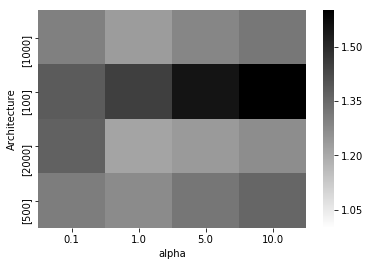

In [12]:
df = pd.read_csv("../result/EMLHeatMap.csv")
df = df.loc[df["Activation Function"] == "relu"]
df = df.pivot("Architecture", "alpha", "mean Validation Error")
ax = sns.heatmap(df, cmap="binary", vmin=1, vmax = 1.6)

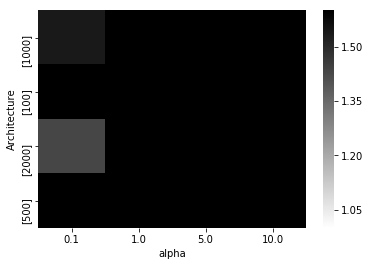

In [11]:
df = pd.read_csv("../result/EMLHeatMap.csv")
df = df.loc[df["Activation Function"] == "sigmoid"]
df = df.pivot("Architecture", "alpha", "mean Validation Error")
ax = sns.heatmap(df, cmap="binary", vmin=1, vmax = 1.6)

NOW SECOND GRID SEARCH FOR THE BETTER NETWORK ARCHITECTURE WE HAVE FOUND

In [3]:
models = [[2000]]
alpha = np.linspace(0.1, 5, 100)
activation = ["relu"]
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)

In [4]:
results = []
# grid search along different type of networks and activation function and alpha
for i in itertools.product(models, alpha, activation):
    print(i)
    ellm = elm.elm(NetworArchitecture = i[0], activation = i[2] ,alpha = i[1])
    val, train = ellm.trainCV(X, Y)
    results.append([*val, *train, i[0], i[1], i[2]])
newresults = []
#convert the results
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),np.std(np.array(i[:4])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)
df = df.rename(index=str, columns={0: "mean Validation Error", 3: "Architecture", 4:"alpha", 5:"Activation Function" })
df.to_csv("../result/ELMSearchForAlpha.csv")

([2000], 0.1, 'relu')
Mean validation: 1.32 +- 0.061
Mean training: 0.60 +- 0.013
Time: 1.90
([2000], 0.14949494949494951, 'relu')
Mean validation: 1.30 +- 0.087
Mean training: 0.66 +- 0.025
Time: 1.92
([2000], 0.198989898989899, 'relu')
Mean validation: 1.25 +- 0.053
Mean training: 0.69 +- 0.008
Time: 1.78
([2000], 0.2484848484848485, 'relu')
Mean validation: 1.25 +- 0.080
Mean training: 0.73 +- 0.027
Time: 1.90
([2000], 0.297979797979798, 'relu')
Mean validation: 1.26 +- 0.073
Mean training: 0.76 +- 0.015
Time: 1.95
([2000], 0.3474747474747475, 'relu')
Mean validation: 1.25 +- 0.078
Mean training: 0.77 +- 0.015
Time: 1.87
([2000], 0.396969696969697, 'relu')
Mean validation: 1.23 +- 0.058
Mean training: 0.79 +- 0.018
Time: 1.80
([2000], 0.44646464646464656, 'relu')
Mean validation: 1.24 +- 0.065
Mean training: 0.80 +- 0.024
Time: 1.83
([2000], 0.49595959595959604, 'relu')
Mean validation: 1.25 +- 0.071
Mean training: 0.82 +- 0.022
Time: 1.80
([2000], 0.5454545454545455, 'relu')
Mean v

Mean validation: 1.25 +- 0.079
Mean training: 1.06 +- 0.015
Time: 3.16
([2000], 3.911111111111112, 'relu')
Mean validation: 1.25 +- 0.076
Mean training: 1.07 +- 0.018
Time: 3.21
([2000], 3.9606060606060614, 'relu')
Mean validation: 1.25 +- 0.073
Mean training: 1.06 +- 0.014
Time: 3.12
([2000], 4.01010101010101, 'relu')
Mean validation: 1.25 +- 0.071
Mean training: 1.06 +- 0.018
Time: 2.95
([2000], 4.05959595959596, 'relu')
Mean validation: 1.25 +- 0.074
Mean training: 1.07 +- 0.018
Time: 2.96
([2000], 4.109090909090909, 'relu')
Mean validation: 1.26 +- 0.086
Mean training: 1.07 +- 0.013
Time: 3.16
([2000], 4.158585858585859, 'relu')
Mean validation: 1.25 +- 0.068
Mean training: 1.07 +- 0.018
Time: 3.10
([2000], 4.208080808080808, 'relu')
Mean validation: 1.26 +- 0.079
Mean training: 1.07 +- 0.016
Time: 3.13
([2000], 4.257575757575758, 'relu')
Mean validation: 1.26 +- 0.082
Mean training: 1.07 +- 0.016
Time: 3.13
([2000], 4.307070707070707, 'relu')
Mean validation: 1.25 +- 0.070
Mean tr

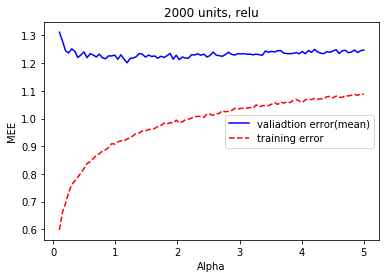

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv("../result/ELMSearchForAlpha.csv")
plt.plot(df["alpha"], df["mean Validation Error"], '-b', label='valiadtion error(mean)')
plt.plot(df["alpha"], df["1"], '--r', label='training error')
plt.xlabel("Alpha")
plt.ylabel("MEE")
plt.title("2000 units, relu")
plt.legend(loc = 'center right')

In [6]:
df.sort_values("mean Validation Error")

,Unnamed: 0,mean Validation Error,1,2,Architecture,alpha,Activation Function
22,22,1.201150,0.926345,0.058182,[2000],1.188889,relu
39,39,1.212896,0.984230,0.064687,[2000],2.030303,relu
19,19,1.213955,0.915628,0.074910,[2000],1.040404,relu
37,37,1.214468,0.983510,0.060717,[2000],1.931313,relu
21,21,1.214974,0.918349,0.070952,[2000],1.139394,relu
15,15,1.215920,0.887073,0.058638,[2000],0.842424,relu
23,23,1.217282,0.930061,0.076885,[2000],1.238384,relu
32,32,1.217588,0.971175,0.072365,[2000],1.683838,relu
42,42,1.218132,0.997489,0.070093,[2000],2.178788,relu
41,41,1.218205,0.995564,0.067038,[2000],2.129293,relu
